In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re


In [22]:
# Cargar un archivo de datos en formato pickle y guardarlo en el DataFrame `tweets_df`
tweets_df = pd.read_pickle('../data/data_tweets.pkl')

# Establecer la columna 'id_2' como índice del DataFrame
tweets_df.set_index('id_2', inplace=True)

# Eliminar las columnas 'ID_1' y 'type' del DataFrame
tweets_df.drop(['ID_1', 'type'], axis=1, inplace=True)

# Renombrar la columna 'Emprea' a 'Empresa' para corregir el nombre
tweets_df.rename(columns={'Emprea': 'Empresa'}, inplace=True)

# Convertir la columna 'tweetText' al tipo de datos `string`
tweets_df['tweetText'] = tweets_df['tweetText'].astype('string')

tweets_df.head(2)

,Empresa,tweetText,tweetURL,tweetAuthor,handle,replyCount,quoteCount,retweetCount,likeCount,views,bookmarkCount,createdAt,allMediaURL,videoURL,Idioma_1,Idioma_2,Año,Unnamed: 20,Unnamed: 21,openai_tag
id_2,,,,,,,,,,,,,,,,,,,,
948282772120064000,1,"This year, we are looking forward to having mo...",https://twitter.com/abinbev/status/94828277212...,AB InBev,@abinbev,0,0,12,29,-,0,2018-01-02 21:00:05,https://pbs.twimg.com/media/DSj6JxHXcAAu4Jd.jpg,NaN,1.0,NaN,2018,NaN,NaN,No
950803659465658368,1,Our Chief People Officer David Almeida talks a...,https://twitter.com/abinbev/status/95080365946...,AB InBev,@abinbev,0,0,7,21,-,0,2018-01-09 19:57:12,https://pbs.twimg.com/media/DTHu2wQWkAEpVbv.jpg,NaN,1.0,NaN,2018,NaN,NaN,No


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387769 entries, 948282772120064000 to 947771508440682496
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Empresa        387769 non-null  int64         
 1   tweetText      387769 non-null  string        
 2   tweetURL       387769 non-null  object        
 3   tweetAuthor    387769 non-null  object        
 4   handle         387769 non-null  object        
 5   replyCount     387769 non-null  int64         
 6   quoteCount     387769 non-null  int64         
 7   retweetCount   387769 non-null  int64         
 8   likeCount      387769 non-null  int64         
 9   views          201330 non-null  object        
 10  bookmarkCount  387769 non-null  int64         
 11  createdAt      387769 non-null  datetime64[ns]
 12  allMediaURL    128790 non-null  object        
 13  videoURL       38920 non-null   object        
 14  Idioma_1       385204 non-nu

In [23]:
# Veo dimensiones del dataframe
# Obtener el número de tweets (filas) y campos por tweet (columnas)
num_tweets, num_fields = tweets_df.shape

# Imprimir el resultado con formato
print(f"El DataFrame contiene {num_tweets} tweets y {num_fields} campos por tweet.")


El DataFrame contiene 387769 tweets y 20 campos por tweet.


In [ ]:
#  Los tweets están en varios idiomas, veo cuántos tweets hay por idioma
tweets_df['Idioma_1'].value_counts()

Idioma_1
1.0    230336
2.0     68282
4.0     40119
3.0     33810
5.0     12657
Name: count, dtype: int64

In [ ]:


# Lista de palabras a buscar proporcionadas por Fenando
palabras = ['medio ambiente', 'sostenible', 'ecológico', 'verde', 'biodegradable', 'compostable']


# Listado de palabras en inglés, español, francés, alemán e italiano generadas a partir de las proporcionadas por Fernando usando ChatGPT
# Cada palabra aparece una única vez y en la fila del sinónimo correspondiente

# Lista de listas agrupadas por sinónimos para cada uno de los idiomas
words_in_english = [
    ["environment", "nature", "ecosystem"],  # Synonyms for 'environment'
    ["sustainable", "renewable", "viable"],  # Synonyms for 'sustainable'
    ["ecological", "eco-friendly"],  # Synonyms for 'ecological'
    ["green", "natural", "organic"],  # Synonyms for 'green'
    ["biodegradable", "decomposable", "environmentally-friendly"],  # Synonyms for 'biodegradable'
    ["compostable", "recyclable", "degradable"]  # Synonyms for 'compostable'
]

words_in_spanish = [
    ["medio ambiente", "naturaleza", "entorno", "ecosistema", "ambiente"],  # Sinónimos de 'medio ambiente'
    ["sostenible", "sustentable", "renovable", "viable", "ecológico"],  # Sinónimos de 'sostenible'
    ["ambiental", "ecoamigable", "natural"],  # Sinónimos de 'ecológico'
    ["verde", "orgánico", "sano"],  # Sinónimos de 'verde'
    ["biodegradable", "degradable", "ecofriendly"],  # Sinónimos de 'biodegradable'
    ["compostable", "reciclable", "desechable", "descomponible"]  # Sinónimos de 'compostable'
]

words_in_french = [
    ["environnement", "nature", "écosystème", "milieu", "entourage"],  # Synonyms for 'medio ambiente'
    ["durable", "soutenable", "viable", "renouvelable", "écologique"],  # Synonyms for 'sostenible'
    ["environnemental", "éco-responsable", "naturel"],  # Synonyms for 'ecológico'
    ["vert", "biologique", "sain"],  # Synonyms for 'verde'
    ["biodégradable", "décomposable", "respectueux de l'environnement"],  # Synonyms for 'biodegradable'
    ["compostable", "recyclable", "dégradable"]  # Synonyms for 'compostable'
]

words_in_german = [
    ["umwelt", "natur", "ökosystem", "umfeld", "umgebung"],  # Synonyms for 'medio ambiente'
    ["nachhaltig", "tragfähig", "erneuerbar", "beständig", "ökologisch"],  # Synonyms for 'sostenible'
    ["umweltfreundlich", "natürlich", "umweltbezogen"],  # Synonyms for 'ecológico'
    ["grün", "biologisch", "gesund"],  # Synonyms for 'verde'
    ["biologisch abbaubar", "abbaubar", "umweltfreundlich"],  # Synonyms for 'biodegradable'
    ["kompostierbar", "recycelbar", "zerlegbar"]  # Synonyms for 'compostable'
]


words_in_italian = [
    ["ambiente", "natura", "ecosistema", "contesto", "circondario"],  # Synonyms for 'medio ambiente'
    ["sostenibile", "rinnovabile", "duraturo", "fattibile"],  # Synonyms for 'sostenible'
    ["ecologico", "ambientale", "eco-compatibile", "naturale"],  # Synonyms for 'ecológico'
    ["verde", "organico", "salutare"],  # Synonyms for 'verde'
    ["biodegradabile", "degradabile", "amico dell'ambiente"],  # Synonyms for 'biodegradable'
    ["compostabile", "riciclabile", "disintegrabile"]  # Synonyms for 'compostable'
]

# Diccionario con el nombre de los idiomas como clave y la lista de palabras como valor
words_by_language = {
    "inglés": words_in_english,
    "español": words_in_spanish,
    "francés": words_in_french,
    "alemán": words_in_german,
    "italiano": words_in_italian
}



In [7]:
# Idiomas detectados en fichero excell. Los números se corresponden a la comlumna Idioma_1

idiomas_dict = {
    1: "inglés",
    2: "español",
    3: "francés",
    4: "alemán",
    5: "italiano"
}



# Crear un diccionario para almacenar DataFrames separados por idioma
dataframes_by_language = {}

# Dividir el DataFrame principal en sub-DataFrames por idioma
for idioma_id, idioma_name in idiomas_dict.items():
    dataframes_by_language[idioma_name] = tweets_df[tweets_df['Idioma_1'] == idioma_id].copy()


In [8]:
# Procesar cada idioma
for idioma, df in dataframes_by_language.items():
    # Obtener las listas de palabras para este idioma
    words_list = words_by_language.get(idioma, [])
    
    # Crear columnas basadas en las primeras palabras de cada lista de sinónimos
    for word_group in words_list:
        column_name = word_group[0]  # Usar la primera palabra como nombre de columna
        
        # Crear un patrón regex para todas las palabras del grupo, ignorando puntuación
        pattern = rf'\b({"|".join(re.escape(word) for word in word_group)})[^\w]*\b'
        
        # Contar las apariciones de todas las palabras del grupo en cada tweet
        df[column_name] = df['tweetText'].str.lower().str.count(pattern)
    
    # Reemplazar el DataFrame en el diccionario con el actualizado
    dataframes_by_language[idioma] = df

# Mostrar las claves del diccionario para verificar el procesamiento
dataframes_by_language.keys()

dict_keys(['inglés', 'español', 'francés', 'alemán', 'italiano'])

In [17]:
dataframes_by_language['inglés'].iloc[:, 20:].sum()

environment      2142
sustainable      5163
ecological        151
green            1905
biodegradable      42
compostable       155
dtype: Int64

In [20]:
(dataframes_by_language['inglés'].iloc[:, 20:] > 1).sum()

environment       66
sustainable      320
ecological         2
green            126
biodegradable      1
compostable       26
dtype: Int64

In [14]:
dataframes_by_language['español'].iloc[:, 20:].sum()

medio ambiente     774
sostenible        2105
ambiental          166
verde              885
biodegradable        7
compostable          9
dtype: Int64

In [18]:
(dataframes_by_language['español'].iloc[:, 20:] != 0).sum()

medio ambiente     743
sostenible        2010
ambiental          164
verde              860
biodegradable        7
compostable          9
dtype: Int64

In [32]:
df_english.loc[:, df_english.columns[20:-1]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 230336 entries, 948282772120064000 to 948353582155223040
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   environment    230336 non-null  Int64
 1   sustainable    230336 non-null  Int64
 2   ecological     230336 non-null  Int64
 3   green          230336 non-null  Int64
 4   biodegradable  230336 non-null  Int64
 5   compostable    230336 non-null  Int64
dtypes: Int64(6)
memory usage: 13.6 MB


In [38]:
df_english.groupby('YearMonth')[df_english.columns[20:-1]].sum()

,environment,sustainable,ecological,green,biodegradable,compostable
YearMonth,,,,,,
2018-01,14,53,0,35,1,0
2018-02,22,46,4,25,1,3
2018-03,17,65,1,29,3,3
2018-04,28,49,4,23,0,1
2018-05,49,48,2,30,0,1
...,...,...,...,...,...,...
2023-08,12,43,1,8,0,0
2023-09,14,66,2,14,1,2
2023-10,18,41,2,13,0,0


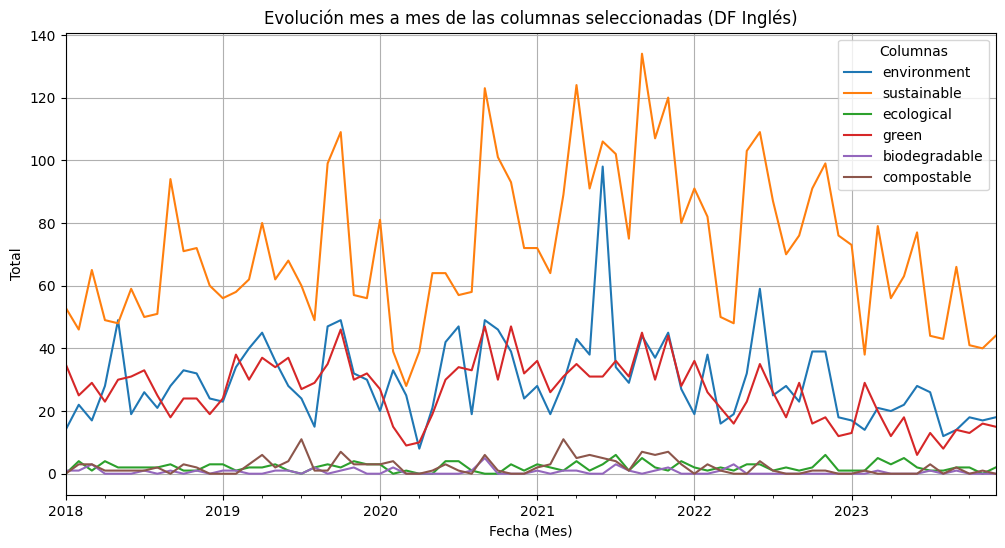

In [39]:
import matplotlib.pyplot as plt

# Convertir 'createdAt' a datetime si no lo está ya
df_english['createdAt'] = pd.to_datetime(df_english['createdAt'])

# Extraer el año y mes para agrupar
df_english['YearMonth'] = df_english['createdAt'].dt.to_period('M')

# Seleccionar las columnas desde la 20 en adelante que sean numéricas
columns_to_analyze = df_english.columns[20:-1]

# Agrupar por 'YearMonth' y sumar los valores
monthly_data = df_english.groupby('YearMonth')[columns_to_analyze].sum()

# Plotear la evolución mes a mes
monthly_data.plot(figsize=(12, 6))
plt.title("Evolución mes a mes de las columnas seleccionadas (DF Inglés)")
plt.xlabel("Fecha (Mes)")
plt.ylabel("Total")
plt.legend(title="Columnas")
plt.grid(True)
plt.show()
